In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data=pd.read_csv('train.csv')
train_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,376,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,306,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,139,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,90,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,381,0.0,141.000000,360.0,1.0,2,1
5,5,1,1,2,0,1,353,4196.0,267.000000,360.0,1.0,2,1
6,6,1,1,0,1,0,65,1516.0,95.000000,360.0,1.0,2,1
7,7,1,1,4,0,0,146,2504.0,158.000000,360.0,0.0,1,0
8,8,1,1,2,0,0,269,1526.0,168.000000,360.0,1.0,2,1
9,9,1,1,1,0,0,470,10968.0,349.000000,360.0,1.0,1,0


# EDA


In [3]:
train_data.shape

(614, 13)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    int64  
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 62.5 KB


In [5]:
train_data.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.817590,0.653094,0.827362,0.218241,0.133550,247.117264,1621.245798,146.412162,342.000000,0.842199,1.037459,0.687296
std,177.390811,0.386497,0.476373,1.212833,0.413389,0.340446,143.537853,2926.248369,84.037468,64.372489,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,120.250000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,244.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,1.000000,0.000000,0.000000,369.750000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,4.000000,1.000000,1.000000,504.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [6]:
#Missing values
train_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
#To find duplicates
duplicate_rows = train_data[train_data.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []


In [8]:
train_data.LoanAmount=train_data.LoanAmount.fillna(train_data.LoanAmount.mean())
train_data.Credit_History=train_data.Credit_History.fillna(train_data.Credit_History.mean())
train_data.Loan_Amount_Term=train_data.Loan_Amount_Term.fillna(train_data.Loan_Amount_Term.mean())
train_data['Gender'].fillna(train_data['Gender'].value_counts().idxmax(), inplace=True)
train_data['Married'].fillna(train_data['Married'].value_counts().idxmax(), inplace=True)
train_data.Dependents.fillna(train_data.Dependents.value_counts().idxmax(), inplace=True)
train_data.Self_Employed.fillna(train_data.Self_Employed.value_counts().idxmax(), inplace=True)

In [9]:
train_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train_data['Loan_ID']=le.fit_transform(train_data['Loan_ID'])
train_data['Gender']=le.fit_transform(train_data['Gender'])
train_data['Married']=le.fit_transform(train_data['Married'])
train_data['Education']=le.fit_transform(train_data['Education'])
train_data['Self_Employed']=le.fit_transform(train_data['Self_Employed'])
train_data['ApplicantIncome']=le.fit_transform(train_data['ApplicantIncome'])
train_data['Property_Area']=le.fit_transform(train_data['Property_Area'])
train_data['Loan_Status']=le.fit_transform(train_data['Loan_Status'])
train_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,376,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,306,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,139,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,90,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,381,0.0,141.000000,360.0,1.0,2,1
5,5,1,1,2,0,1,353,4196.0,267.000000,360.0,1.0,2,1
6,6,1,1,0,1,0,65,1516.0,95.000000,360.0,1.0,2,1
7,7,1,1,4,0,0,146,2504.0,158.000000,360.0,0.0,1,0
8,8,1,1,2,0,0,269,1526.0,168.000000,360.0,1.0,2,1
9,9,1,1,1,0,0,470,10968.0,349.000000,360.0,1.0,1,0


In [11]:
train_data.loc[train_data['Dependents'] == '3+', 'Dependents'] = 4
train_data.head(10)
train_data.to_csv('train.csv', index=False)
train_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,376,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,306,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,139,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,90,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,381,0.0,141.000000,360.0,1.0,2,1
5,5,1,1,2,0,1,353,4196.0,267.000000,360.0,1.0,2,1
6,6,1,1,0,1,0,65,1516.0,95.000000,360.0,1.0,2,1
7,7,1,1,4,0,0,146,2504.0,158.000000,360.0,0.0,1,0
8,8,1,1,2,0,0,269,1526.0,168.000000,360.0,1.0,2,1
9,9,1,1,1,0,0,470,10968.0,349.000000,360.0,1.0,1,0


In [12]:
train_data['Dependents'].unique()

array([0, 1, 2, 4])

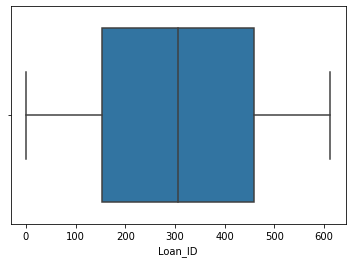

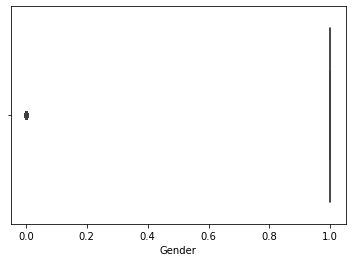

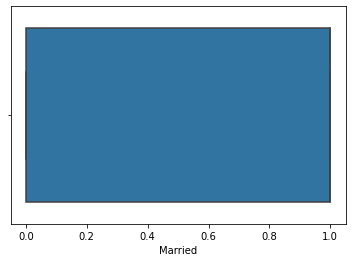

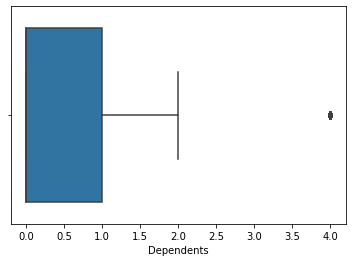

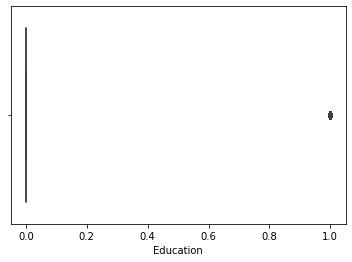

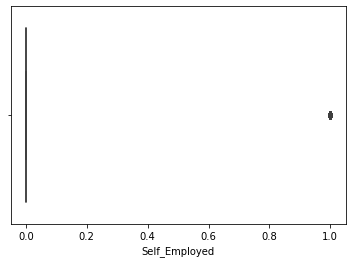

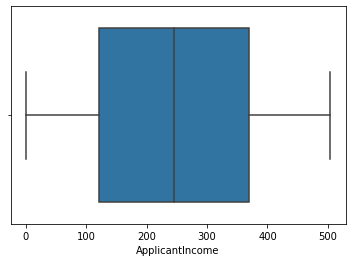

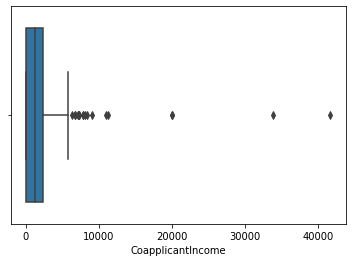

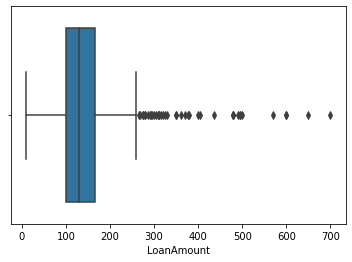

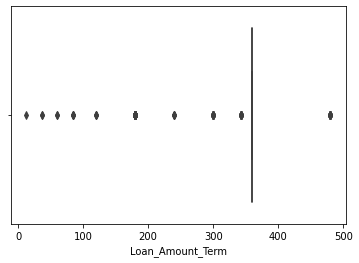

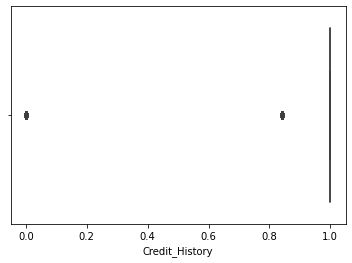

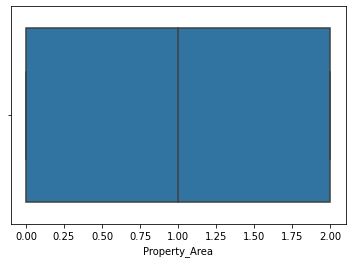

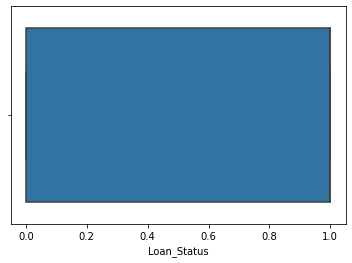

In [13]:
for i in train_data:
    sns.boxplot(x=train_data[i])
    plt.show()

In [14]:
from scipy import stats
#Gender
IQR =stats.iqr(train_data.Gender,interpolation='midpoint')
IQR

Q1=train_data.Gender.quantile(0.25)
Q3=train_data.Gender.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(1.0, 1.0)

In [15]:
train_data.loc[train_data.Gender<min_limit]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
17,17,0,0,0,0,0,208,0.0,76.0,360.0,0.000000,2,0
29,29,0,0,2,0,0,240,2083.0,120.0,360.0,1.000000,1,1
37,37,0,1,0,0,0,228,1459.0,144.0,360.0,1.000000,1,1
45,45,0,0,0,0,0,195,0.0,88.0,342.0,1.000000,2,1
48,48,0,1,0,0,0,95,3440.0,120.0,360.0,0.000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,587,0,0,0,1,0,49,0.0,70.0,360.0,1.000000,1,1
600,600,0,0,4,0,0,2,41667.0,350.0,180.0,0.842199,2,0
604,604,0,1,1,0,0,468,0.0,496.0,360.0,1.000000,1,1
609,609,0,0,0,0,0,125,0.0,71.0,360.0,1.000000,0,1


In [16]:
train_data.loc[train_data.Gender>max_limit]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [17]:
train_data.loc[train_data['Gender']<min_limit,'Gender']=np.median(train_data.Gender)

In [18]:
train_data.loc[train_data.Gender<min_limit]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [19]:
#Dependents
IQR =stats.iqr(train_data.Dependents,interpolation='midpoint')
IQR

Q1=train_data.Dependents.quantile(0.25)
Q3=train_data.Dependents.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-1.5, 2.5)

In [20]:
train_data.loc[train_data.Dependents<min_limit]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [21]:
train_data.loc[train_data.Dependents>max_limit]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
7,7,1,1,4,0,0,146,2504.0,158.000000,360.0,0.000000,1,0
34,34,1,0,4,0,0,469,3000.0,320.000000,360.0,1.000000,0,0
61,61,1,1,4,0,0,144,0.0,99.000000,360.0,1.000000,2,1
68,68,1,1,4,1,1,413,0.0,125.000000,60.0,1.000000,2,1
73,73,1,1,4,1,0,324,0.0,95.000000,342.0,0.000000,1,0
74,74,1,1,4,0,1,348,1774.0,187.000000,360.0,1.000000,1,1
78,78,1,1,4,0,0,166,4000.0,180.000000,300.0,0.000000,1,0
79,79,1,1,4,1,1,186,2166.0,130.000000,360.0,0.842199,1,1
109,109,1,1,4,1,0,42,754.0,94.000000,480.0,1.000000,1,1
126,126,1,1,4,0,0,497,0.0,370.000000,360.0,1.000000,0,1


In [22]:
train_data.loc[train_data['Dependents']>max_limit,'Dependents']=np.median(train_data.Dependents)

In [23]:
train_data.loc[train_data.Dependents>max_limit]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [24]:
#Education
IQR =stats.iqr(train_data.Education,interpolation='midpoint')
IQR

Q1=train_data.Education.quantile(0.25)
Q3=train_data.Education.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(0.0, 0.0)

In [25]:
train_data.loc[train_data.Education<min_limit]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [26]:
train_data.loc[train_data.Education>max_limit]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
3,3,1,1,0,1,0,90,2358.0,120.000000,360.0,1.000000,2,1
6,6,1,1,0,1,0,65,1516.0,95.000000,360.0,1.000000,2,1
16,16,1,0,1,1,0,218,0.0,100.000000,240.0,0.842199,2,1
18,18,1,1,0,1,0,331,0.0,133.000000,360.0,1.000000,0,0
20,20,1,1,0,1,0,423,0.0,104.000000,360.0,0.000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,595,1,0,0,1,0,248,0.0,110.000000,360.0,1.000000,0,1
596,596,1,1,2,1,1,398,1000.0,187.000000,360.0,1.000000,0,0
601,601,1,1,0,1,0,123,2792.0,155.000000,360.0,1.000000,0,1
605,605,1,1,0,1,0,71,3800.0,146.412162,180.0,1.000000,2,0


In [27]:
train_data.loc[train_data['Education']>max_limit,'Education']=np.median(train_data.Education)

In [28]:
train_data.loc[train_data.Education>max_limit]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [29]:
#Self Employed
IQR =stats.iqr(train_data.Self_Employed,interpolation='midpoint')
IQR

Q1=train_data.Self_Employed.quantile(0.25)
Q3=train_data.Self_Employed.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(0.0, 0.0)

In [30]:
train_data.loc[train_data.Self_Employed<min_limit]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [31]:
train_data.loc[train_data.Self_Employed>max_limit]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
2,2,1,1,0,0,1,139,0.0,66.0,360.0,1.0,2,1
5,5,1,1,2,0,1,353,4196.0,267.0,360.0,1.0,2,1
25,25,1,1,0,0,1,450,0.0,191.0,360.0,1.0,1,1
32,32,1,0,1,0,1,317,0.0,106.0,360.0,1.0,0,0
44,44,1,1,0,0,1,318,0.0,96.0,342.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,592,1,0,0,0,1,446,0.0,292.0,360.0,1.0,1,1
594,594,1,1,0,0,1,481,0.0,260.0,360.0,1.0,2,1
596,596,1,1,2,0,1,398,1000.0,187.0,360.0,1.0,0,0
598,598,1,1,0,0,1,453,0.0,180.0,360.0,1.0,0,1


In [32]:
train_data.loc[train_data['Self_Employed']>max_limit,'Self_Employed']=np.median(train_data.Self_Employed)

In [33]:
train_data.loc[train_data.Education>max_limit]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [34]:
#CoapplicantIncome
IQR =stats.iqr(train_data.CoapplicantIncome,interpolation='midpoint')
IQR

Q1=train_data.CoapplicantIncome.quantile(0.25)
Q3=train_data.CoapplicantIncome.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-3438.75, 5736.0)

In [35]:
train_data.loc[train_data.CoapplicantIncome<min_limit]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [36]:
train_data.loc[train_data.CoapplicantIncome>max_limit]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
9,9,1,1,1,0,0,470,10968.0,349.0,360.0,1.000000,1,0
12,12,1,1,2,0,0,150,8106.0,200.0,360.0,1.000000,2,1
38,38,1,0,0,0,0,279,7210.0,184.0,360.0,1.000000,2,1
122,122,1,0,0,0,0,46,8980.0,137.0,360.0,0.000000,1,1
135,135,1,1,0,0,0,268,7750.0,290.0,360.0,1.000000,1,0
177,177,1,1,0,0,0,358,11300.0,495.0,360.0,0.000000,1,0
180,180,1,1,1,0,0,399,7250.0,180.0,360.0,0.000000,2,0
253,253,1,1,1,0,0,98,7101.0,279.0,180.0,1.000000,1,1
349,349,1,1,0,0,0,94,6250.0,187.0,360.0,1.000000,0,1
372,372,1,1,2,0,0,444,7873.0,380.0,300.0,1.000000,0,1


In [37]:
train_data.loc[train_data['CoapplicantIncome']>max_limit,'CoapplicantIncome']=np.median(train_data.CoapplicantIncome)

In [38]:
train_data.loc[train_data.CoapplicantIncome>max_limit]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [39]:
#LoanAmount
IQR =stats.iqr(train_data.LoanAmount,interpolation='midpoint')
IQR

Q1=train_data.LoanAmount.quantile(0.25)
Q3=train_data.LoanAmount.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(4.25, 260.75)

In [40]:
train_data.loc[train_data.LoanAmount<min_limit]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [41]:
train_data.loc[train_data.LoanAmount>max_limit]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
5,5,1,1,2,0,0,353,4196.0,267.0,360.0,1.000000,2,1
9,9,1,1,1,0,0,470,1188.5,349.0,360.0,1.000000,1,0
21,21,1,1,1,0,0,380,5625.0,315.0,360.0,1.000000,2,1
34,34,1,0,0,0,0,469,3000.0,320.0,360.0,1.000000,0,0
54,54,1,1,1,0,0,466,0.0,286.0,360.0,0.000000,2,0
67,67,1,1,1,0,0,460,0.0,312.0,360.0,1.000000,2,1
83,83,1,1,0,0,0,381,2250.0,265.0,360.0,0.842199,1,0
126,126,1,1,0,0,0,497,0.0,370.0,360.0,1.000000,0,1
130,130,1,0,0,0,0,493,0.0,650.0,480.0,0.842199,2,1
135,135,1,1,0,0,0,268,1188.5,290.0,360.0,1.000000,1,0


In [42]:
train_data.loc[train_data['LoanAmount']>max_limit,'LoanAmount']=np.median(train_data.LoanAmount)

In [43]:
train_data.loc[train_data.LoanAmount>max_limit]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [44]:
#	Loan_Amount_Term
IQR =stats.iqr(train_data.	Loan_Amount_Term,interpolation='midpoint')
IQR

Q1=train_data.Loan_Amount_Term.quantile(0.25)
Q3=train_data.Loan_Amount_Term.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(360.0, 360.0)

In [45]:
train_data.loc[train_data.Loan_Amount_Term<min_limit]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
14,14,1,1,2,0,0,7,1086.0,17.000000,120.0,1.000000,2,1
16,16,1,0,1,0,0,218,0.0,100.000000,240.0,0.842199,2,1
19,19,1,1,0,0,0,91,3500.0,115.000000,342.0,1.000000,2,1
36,36,1,1,0,0,0,21,1330.0,100.000000,342.0,0.000000,2,0
44,44,1,1,0,0,0,318,0.0,96.000000,342.0,1.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,591,1,1,2,0,0,381,0.0,205.000000,240.0,1.000000,1,0
593,593,1,1,0,0,0,252,3300.0,142.000000,180.0,1.000000,0,1
600,600,1,0,0,0,0,2,1188.5,129.000000,180.0,0.842199,2,0
605,605,1,1,0,0,0,71,3800.0,146.412162,180.0,1.000000,2,0


In [46]:
train_data.loc[train_data.Loan_Amount_Term>max_limit]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
75,75,1,0,0,0,0,240,0.0,113.0,480.0,1.000000,2,0
109,109,1,1,0,0,0,42,754.0,94.0,480.0,1.000000,1,1
130,130,1,0,0,0,0,493,0.0,129.0,480.0,0.842199,2,1
168,168,1,0,0,0,0,56,0.0,63.0,480.0,0.000000,1,0
179,179,1,0,0,0,0,65,1451.0,102.0,480.0,0.000000,2,0
228,228,1,1,0,0,0,325,0.0,158.0,480.0,1.000000,1,1
248,248,1,1,1,0,0,121,1843.0,123.0,480.0,1.000000,1,1
293,293,1,0,0,0,0,353,0.0,143.0,480.0,0.000000,2,0
298,298,1,0,0,0,0,338,2541.0,151.0,480.0,1.000000,0,0
358,358,1,1,0,0,0,139,1666.0,100.0,480.0,0.000000,2,0


In [47]:
train_data.loc[train_data['Loan_Amount_Term']<min_limit,'Loan_Amount_Term']=np.median(train_data.Loan_Amount_Term)
train_data.loc[train_data['Loan_Amount_Term']>max_limit,'Loan_Amount_Term']=np.median(train_data.Loan_Amount_Term)

In [48]:
train_data.loc[train_data.Loan_Amount_Term<min_limit]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [49]:
train_data.loc[train_data.Loan_Amount_Term>max_limit]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [50]:
#Credit_History
IQR =stats.iqr(train_data.Credit_History,interpolation='midpoint')
IQR

Q1=train_data.Credit_History.quantile(0.25)
Q3=train_data.Credit_History.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(1.0, 1.0)

In [51]:
train_data.loc[train_data.Credit_History<min_limit]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
7,7,1,1,0,0,0,146,2504.0,158.0,360.0,0.000000,1,0
16,16,1,0,1,0,0,218,0.0,100.0,360.0,0.842199,2,1
17,17,1,0,0,0,0,208,0.0,76.0,360.0,0.000000,2,0
20,20,1,1,0,0,0,423,0.0,104.0,360.0,0.000000,2,0
22,22,1,1,0,0,0,91,1911.0,116.0,360.0,0.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,584,1,1,1,0,0,115,1917.0,146.0,360.0,0.000000,0,0
589,589,1,1,2,0,0,108,0.0,106.0,360.0,0.000000,1,0
597,597,1,0,0,0,0,137,0.0,88.0,360.0,0.000000,1,0
600,600,1,0,0,0,0,2,1188.5,129.0,360.0,0.842199,2,0


In [52]:
train_data.loc[train_data.Credit_History>max_limit]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [53]:
train_data.loc[train_data['Credit_History']<min_limit,'Credit_History']=np.median(train_data.Credit_History)

In [54]:
train_data.loc[train_data.Credit_History<min_limit]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


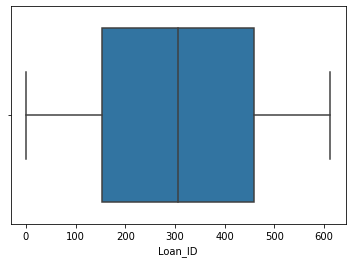

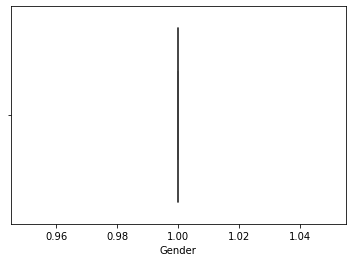

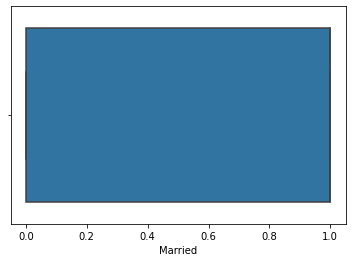

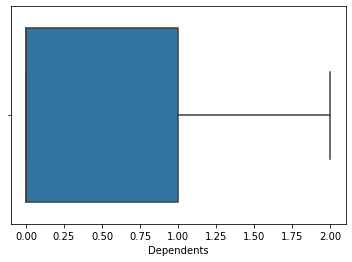

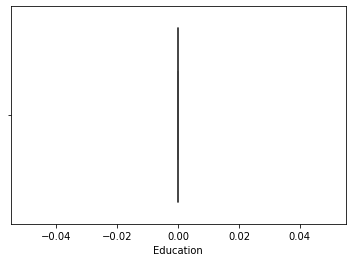

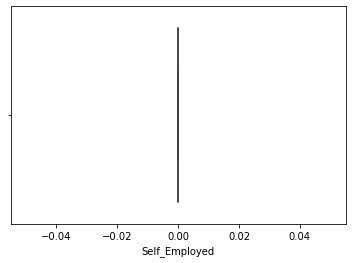

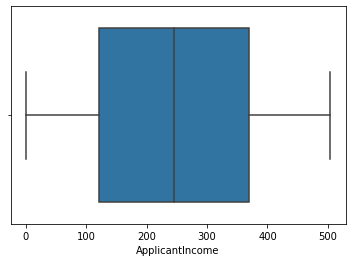

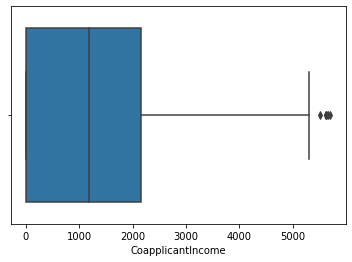

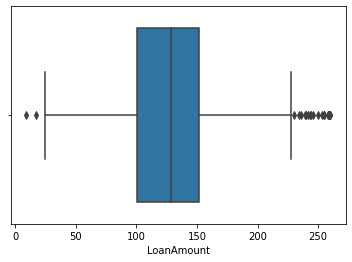

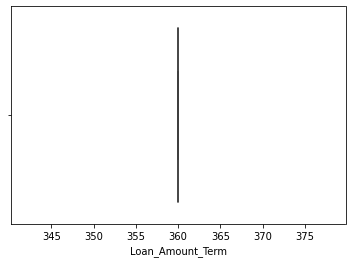

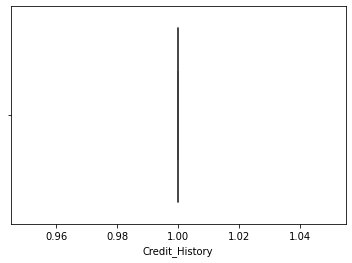

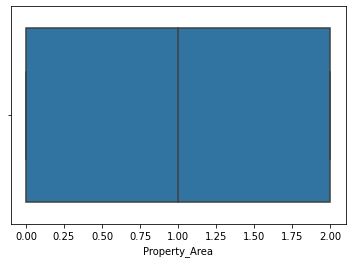

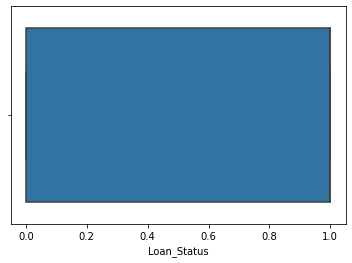

In [55]:
for i in train_data:
    sns.boxplot(x=train_data[i])
    plt.show()

In [56]:
corr=train_data.corr()

<Axes: >

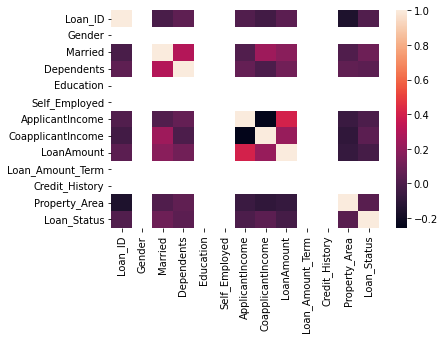

In [57]:
sns.heatmap(corr)

<function matplotlib.pyplot.show(close=None, block=None)>

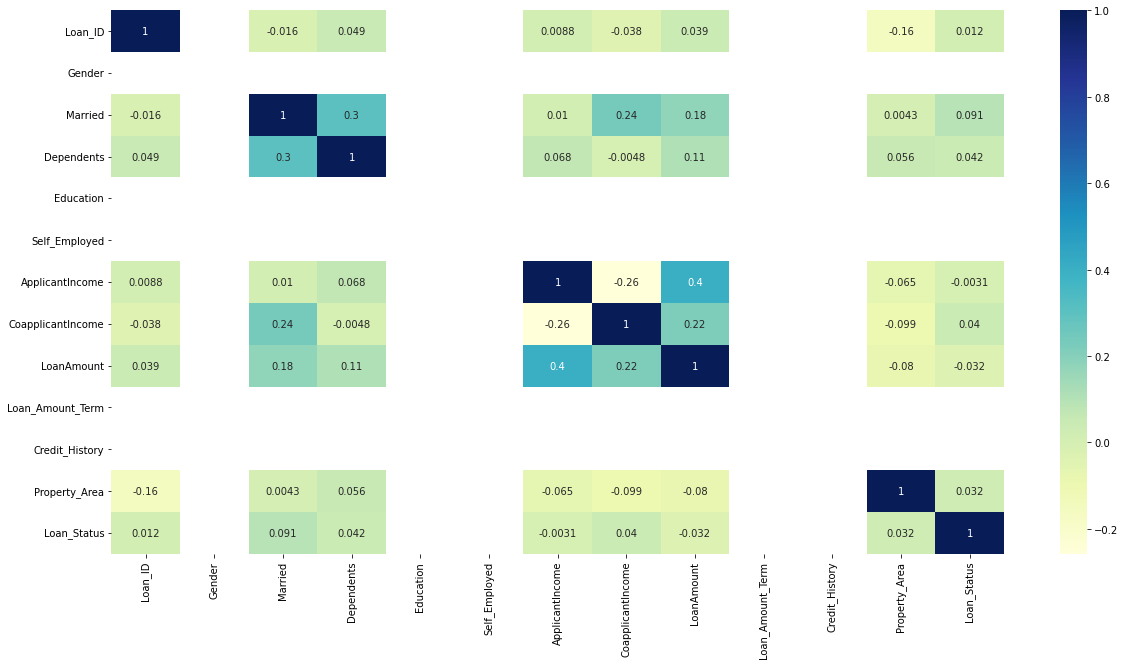

In [58]:
plt.subplots(figsize=(20,10))
sns.heatmap(train_data.corr(), cmap="YlGnBu", annot=True)
plt.show

In [59]:
x=train_data.drop('Loan_Status',axis=1)
y=train_data['Loan_Status']

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.00000000000000000000001)

In [61]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
model=clf.fit(x_train,y_train)

In [62]:
y_pred=model.predict(x_test)

In [63]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy : ',accuracy_score(y_test,y_pred))
print('Precision : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('F1 score : ',f1_score(y_test,y_pred))

Accuracy :  1.0
Precision :  1.0
Recall :  1.0
F1 score :  1.0


In [64]:
y_pred

array([1])

In [65]:
confusion_matrix(y_test,y_pred)

array([[1]])

In [66]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Lasso
lr=linear_model.LinearRegression()

In [67]:
model = lr.fit(x_train,y_train)

In [68]:
y_pred = model.predict(x_test)

In [69]:
from sklearn.metrics import mean_squared_error,r2_score
print('Linear Regression MSE is : ',mean_squared_error(y_test,y_pred))
print('Linear Regression R2 is : ',r2_score(y_test,y_pred))

Linear Regression MSE is :  0.13281203547872028
Linear Regression R2 is :  nan


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [70]:
test_data = pd.read_csv('test.csv')
test_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,1,0.0,0,0,251,0,110.0,360.0,1.0,2
1,1,1,1,1.0,0,0,102,1500,126.0,360.0,1.0,2
2,2,1,1,2.0,0,0,230,1800,208.0,360.0,1.0,2
3,3,1,1,2.0,0,0,43,2546,100.0,360.0,NaN,2
4,4,1,0,0.0,1,0,120,0,78.0,360.0,1.0,2
5,5,1,1,0.0,1,1,28,3422,152.0,360.0,1.0,2
6,6,0,0,1.0,1,0,31,0,59.0,360.0,1.0,1
7,7,1,1,2.0,1,0,168,0,147.0,360.0,0.0,0
8,8,1,1,2.0,0,2,304,0,280.0,240.0,1.0,2
9,9,1,0,0.0,1,0,48,2400,123.0,360.0,1.0,1


In [71]:
test_data.shape

(367, 12)

In [72]:
test_data['Loan_ID']=le.fit_transform(test_data['Loan_ID'])
test_data['Gender']=le.fit_transform(test_data['Gender'])
test_data['Married']=le.fit_transform(test_data['Married'])
test_data['Education']=le.fit_transform(test_data['Education'])
test_data['Self_Employed']=le.fit_transform(test_data['Self_Employed'])
test_data['ApplicantIncome']=le.fit_transform(test_data['ApplicantIncome'])
test_data['Property_Area']=le.fit_transform(test_data['Property_Area'])
test_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,1,0.0,0,0,251,0,110.0,360.0,1.0,2
1,1,1,1,1.0,0,0,102,1500,126.0,360.0,1.0,2
2,2,1,1,2.0,0,0,230,1800,208.0,360.0,1.0,2
3,3,1,1,2.0,0,0,43,2546,100.0,360.0,NaN,2
4,4,1,0,0.0,1,0,120,0,78.0,360.0,1.0,2
5,5,1,1,0.0,1,1,28,3422,152.0,360.0,1.0,2
6,6,0,0,1.0,1,0,31,0,59.0,360.0,1.0,1
7,7,1,1,2.0,1,0,168,0,147.0,360.0,0.0,0
8,8,1,1,2.0,0,2,304,0,280.0,240.0,1.0,2
9,9,1,0,0.0,1,0,48,2400,123.0,360.0,1.0,1


In [73]:
test_data.loc[test_data['Dependents'] == '3+', 'Dependents'] = 4
test_data.head(10)
test_data.to_csv('test.csv', index=False)
test_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,1,0.0,0,0,251,0,110.0,360.0,1.0,2
1,1,1,1,1.0,0,0,102,1500,126.0,360.0,1.0,2
2,2,1,1,2.0,0,0,230,1800,208.0,360.0,1.0,2
3,3,1,1,2.0,0,0,43,2546,100.0,360.0,NaN,2
4,4,1,0,0.0,1,0,120,0,78.0,360.0,1.0,2
5,5,1,1,0.0,1,1,28,3422,152.0,360.0,1.0,2
6,6,0,0,1.0,1,0,31,0,59.0,360.0,1.0,1
7,7,1,1,2.0,1,0,168,0,147.0,360.0,0.0,0
8,8,1,1,2.0,0,2,304,0,280.0,240.0,1.0,2
9,9,1,0,0.0,1,0,48,2400,123.0,360.0,1.0,1


In [74]:
test_data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           10
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [75]:
test_data.LoanAmount=test_data.LoanAmount.fillna(test_data.LoanAmount.mean())
test_data.Credit_History=test_data.Credit_History.fillna(test_data.Credit_History.mean())
test_data.Loan_Amount_Term=test_data.Loan_Amount_Term.fillna(test_data.Loan_Amount_Term.mean())
test_data.Dependents.fillna(test_data.Dependents.value_counts().idxmax(), inplace=True)

In [76]:
test_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [77]:
predictions = model.predict(test_data)

In [78]:
predictions

array([0.70634255, 0.71203451, 0.68025185, 0.75521478, 0.63179861,
       0.70218157, 0.62689957, 0.64896513, 0.60222024, 0.60633944,
       0.62063643, 0.65388022, 0.72021848, 0.67192713, 0.5866454 ,
       0.61883394, 0.70382325, 0.71611336, 0.69435988, 0.63781514,
       0.76645394, 0.7093207 , 0.62112102, 0.59969926, 0.63683302,
       0.92411338, 0.72272388, 0.64195947, 0.73115211, 0.63186056,
       0.60635171, 0.68177838, 0.58137946, 0.69311806, 0.71840834,
       0.5327367 , 0.74340018, 0.74396803, 0.6206897 , 0.62216246,
       0.73003837, 0.61169638, 0.70722259, 0.5776886 , 0.63276941,
       0.70743842, 0.68411016, 0.61161005, 0.62194543, 0.68357841,
       0.71341425, 0.72796315, 0.69721045, 0.80577203, 0.7222999 ,
       0.58717594, 0.56159049, 0.73943138, 0.699588  , 0.74936906,
       0.69204278, 0.70522993, 0.56372148, 0.58230683, 0.74117638,
       0.70582107, 0.66467437, 0.65784054, 0.63080199, 0.66663698,
       0.60062011, 0.63578767, 0.72049417, 0.59595992, 0.71896

In [79]:
df = pd.DataFrame(predictions, columns=['Loan_Status'])

# Save the data frame to a CSV file
df.to_csv('predictions.csv', index=False)

In [80]:
test1_data=pd.read_csv('test1.csv')
df = pd.DataFrame(predictions, columns=['Loan_Status'])
test1_data['Loan_Status'] = df

# Save the updated dataset to a CSV file
test1_data.to_csv('final_dataset.csv', index=False)

In [81]:
df

,Loan_Status
0,0.706343
1,0.712035
2,0.680252
3,0.755215
4,0.631799
...,...
362,0.794177
363,0.726901
364,0.626390
365,0.684640


In [82]:
test1_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,0.706343
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,0.712035
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,0.680252
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,0.755215
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,0.631799
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,0.794177
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,0.726901
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban,0.626390
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,0.684640


In [83]:
columns_to_drop=['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']
final_submission=test1_data.drop(columns_to_drop,axis=1,inplace=True)

In [84]:
final_submission

In [85]:
# Define a threshold value
threshold = 0.5

# Apply a lambda function to the column to assign "Y" or "N" based on the threshold
test1_data['Loan_Status'] = test1_data['Loan_Status'].apply(lambda x: 'Y' if x > threshold else 'N')

# Save the updated dataset to a CSV file
test1_data.to_csv('final.csv', index=False)